### Finding the Zero of a Function

To achieve this goal, you will have to complete 2 steps:
1. Create a matlab function that finds the zero of a special function, called transfnc (a transcendental function of our making);
2. Use the fzero function from the standard matlab/octave library to find the zero of the function.

## Step 1: Creating the function

The transcendental function *transfnc* has the following interface:
Arguments:
The function takes 3 variables as input (x, n, k).
* x: scalar or vector of real values
* n: the linear parameter
* k: the exponential parameter

Outputs:
The function returns 1 real vector variable y of real values. The length of y corresponds to the length of x.

The function definition is as follows:

$y = n tan^{-1}(x) - e^{kx}$

Remember that in matlab/octave, a function is defined by:

`function [outputs] = function_name (args)`

`end`

where 
* *function_name* is a unique name that you choose. 
* *args* is a list of input variables (none, 1 or more)
* *outputs* is a list of output variables (none, 1 or more)

In [44]:
function [y] = transfnc(x,n,k)
    y = n*atan(x)-exp(k*x);
end

##Step 2: Using fzero

The fzero function is in the standard matlab/octave library and it is used as follows

`fzero(@fnc_name, [starting guess])`

The argument `@fnc_name` is called a **function handle**. It works by passing to the function a pointer to the function itself. You can think of it like telling fzero to use the function named `fnc_name(args)` in its internal code. Function handles is one way, in matlab/octave, to pass something else than a variable.

There's one problem though. If the function @fnc_name(args) had exactly 1 argument, it would be simple for fzero to know what to do. Simply change the value of that single argument until it returns a 0 value (or close enough). However, our function has **3 arguments or input variables: x, n, and k**. The code behind fzero can't tell which of the 3 variables to change. Therefore, we have to "tell" fzero what the interface of the function is. Actually, we only have to tell fzero which of the 3 variables to change and what values to put in the other variables. We do this by adding information between the @ sign and the function name. In our case, we could write:

`@(x) fnc_name(x,a1,a2)`

This tells fzero to change the variable called *x* (the name *x* is arbitrary and it doesn't have to match the name of the variable inside the function definition) and pass the values of the variables *a1* and *a2* for *n* and *k* respectively. We call *x* a **dummy variable**.

To test your function, you can use $n=5$, $k=0.2$ and you should have a root at roughly 0.2117. What happens if you use a different starting guess? What about other values of $n,k$? What if you try $n=1.9$,$k=0.4$? Does the initial guess influence the answer you get? Why?

ans = 0.2117


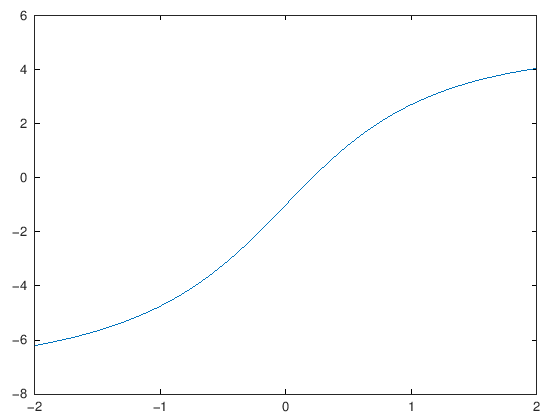

In [67]:
n = 5; k = 0.2;
y = transfcn(x,n,k);
fzero(@(x) transfcn(x,n,k),[0])
plot(x,y)